In [1]:
import cv2
import numpy as np
import os
from gtts import gTTS
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib as mpl
import playsound

from tensorflow.keras.layers import Input

from src.yolo3.model import *
from src.yolo3.detect import *

from src.utils.image import *
from src.utils.datagen import *
from src.utils.fixes import *
import time
fix_tf_gpu()

In [18]:
## **Helper functions**

def prepare_model(approach):
    '''
    Prepare the YOLO model
    '''
    global input_shape, class_names, anchor_boxes, num_classes, num_anchors, model

    # shape (height, width) of the imput image
    input_shape = (416, 416)

    # class names
    if approach == 1: #헬맷, 조끼, 워커
        class_names = ['H', 'V', 'W']

    elif approach == 2: # 워커, 헬맷 쓴 워커, 조끼 입은 워커, 둘다 입은 워커
        class_names  = ['W','WH','WV','WHV']

    elif approach == 3: #워커인지 아닌지
        class_names  = ['W']

    else:
        raise NotImplementedError('Approach should be 1, 2, or 3')

    # anchor boxes
    if approach == 1:
        anchor_boxes = np.array(
            [
            np.array([[ 76,  59], [ 84, 136], [188, 225]]) /32, # output-1 anchor boxes
            np.array([[ 25,  15], [ 46,  29], [ 27,  56]]) /16, # output-2 anchor boxes
            np.array([[ 5,    3], [ 10,   8], [ 12,  26]]) /8   # output-3 anchor boxes
            ],
            dtype='float64'
        )
    else:
        anchor_boxes = np.array(
            [
            np.array([[ 73, 158], [128, 209], [224, 246]]) /32, # output-1 anchor boxes
            np.array([[ 32,  50], [ 40, 104], [ 76,  73]]) /16, # output-2 anchor boxes
            np.array([[ 6,   11], [ 11,  23], [ 19,  36]]) /8   # output-3 anchor boxes
            ],
            dtype='float64'
        )

    # number of classes and number of anchors
    num_classes = len(class_names)
    num_anchors = anchor_boxes.shape[0] * anchor_boxes.shape[1]

    # input and output
    input_tensor = Input( shape=(input_shape[0], input_shape[1], 3) ) # input
    num_out_filters = ( num_anchors//3 ) * ( 5 + num_classes )        # output

    # build the model
    model = yolo_body(input_tensor, num_out_filters)

    # load weights
    weight_path = f'./pictor-ppe-v302-a{approach}-yolo-v3-weights.h5' #가중치 불러와서
    model.load_weights( weight_path )

In [19]:
def get_detection(img):
    # save a copy of the img
    act_img = img.copy()

    # shape of the image
    ih, iw = act_img.shape[:2]

    # preprocess the image
    img = letterbox_image(img, input_shape)
    img = np.expand_dims(img, 0)
    image_data = np.array(img) / 255.

    # raw prediction from yolo model
    prediction = model.predict(image_data)

    # process the raw prediction to get the bounding boxes
    boxes = detection(
        prediction,
        anchor_boxes,
        num_classes,
        image_shape = (ih, iw),
        input_shape = (416,416),
        max_boxes = 10,
        score_threshold=0.3,
        iou_threshold=0.45,
        classes_can_overlap=False)

    # convert tensor to numpy
    boxes = boxes[0].numpy()

    # draw the detection on the actual image
    return draw_detection(act_img, boxes, class_names), boxes 

In [20]:
def plt_imshow(img):
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')

In [12]:
def check_box(box):
    l, t, r, b = box[:4]
    i = 1
    if abs(r-l)/ abs(b-t) < 0.1: #나눈 값이 1 : 9비율보다 크게 가로가 세로 9배이상
        i = -1
    return i

In [25]:
def reading_from_user(input_text, index):
    language = 'ko'
    slow_audio_speed = False
    filename = f"output_{index}.mp3"
    audio_created =gTTS(text=input_text, lang=language, slow=slow_audio_speed)
    audio_created.save(filename)

    #os.system(f'start {filename}') #실행까지 #윈도우 
    os.system(f'afplay {filename}') #리눅스

2021-12-08 11:37:28.164566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-08 11:37:30.798905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-08 11:37:33.146668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


안전 조끼를 착용하였습니다!
현재 7.8862831592559814


2021-12-08 11:37:35.586080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


안전모를 착용하였습니다!
현재 10.703880071640015
------------------------


sh: start: command not found
2021-12-08 11:37:41.004845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-08 11:37:43.687552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


안전 조끼를 착용하였습니다!
현재 18.697091817855835


2021-12-08 11:37:46.564778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


안전모를 착용하였습니다!
현재 21.47028398513794
------------------------


sh: start: command not found
2021-12-08 11:37:51.824618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-08 11:37:54.568103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


안전 조끼를 착용하였습니다!
현재 29.487913131713867


2021-12-08 11:37:57.197187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


안전모를 착용하였습니다!
현재 32.189724922180176
------------------------


sh: start: command not found
2021-12-08 11:38:02.729192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


------------------------


sh: start: command not found


42.05870795249939


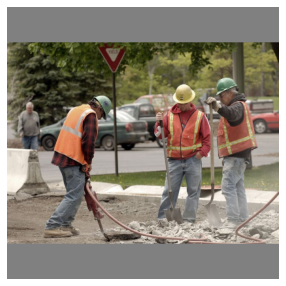

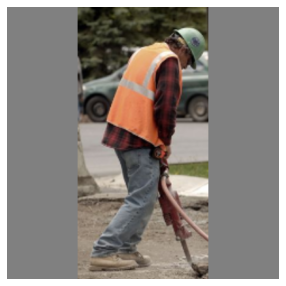

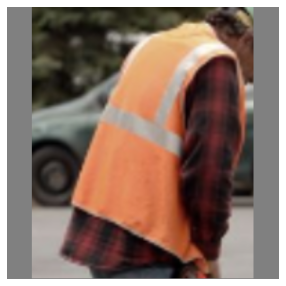

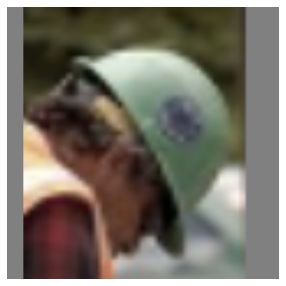

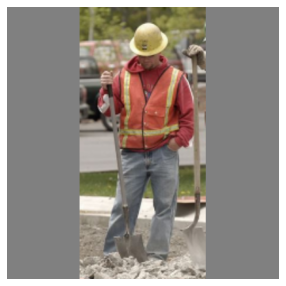

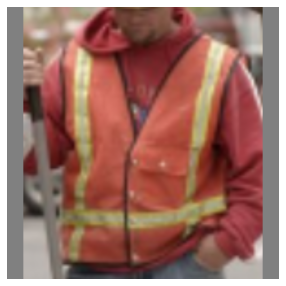

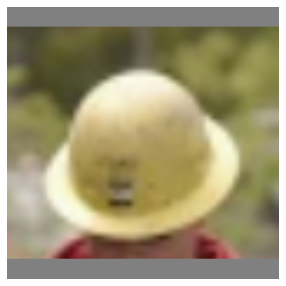

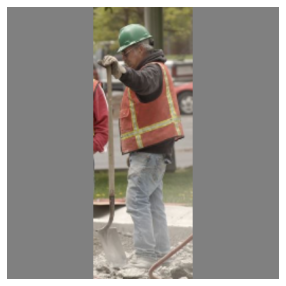

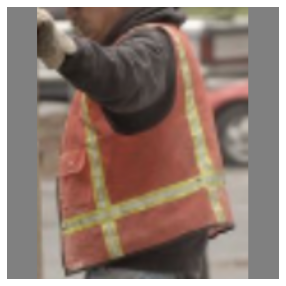

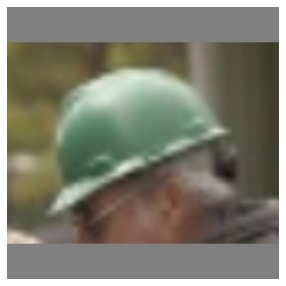

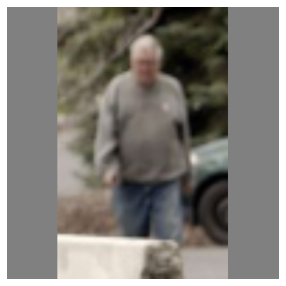

In [26]:
# prepare the model

start = time.time()
prepare_model(approach=3)

for i in range(1):
    # read the image
    img = cv2.imread( f'extras/sample-images/{i}.JPG' )
    # resize
    img = letterbox_image(img, input_shape) #레터박스

    # get the detection on the image
    tmp, boxes = get_detection(img) #디텍션 
    
    fin_boxes = []
    for box in boxes:
        #print(check_box(box))
        if check_box(box) == 1:
            fin_boxes.append(box)
    # show the image
    plt_imshow(img[:, :, ::-1])
    
    ##
    tmp_2 = []
    images_2 = []
    img_2 = []
    for index, i in enumerate(fin_boxes):
        #print(index)
        left, top, right, bottom, accuracy, classes = i
        #print(left, top, right, bottom, accuracy, classes)
        
        if top < 10:
            top = 10
        if bottom > 405:
            bottom = 405
        if left < 10:
            left = 10
        if right > 405:
            rigt = 405

        tmp_2.append(img[int(top)-10:int(bottom)+10, int(left)-10:int(right)+10])
        #plt.imshow(cv2.cvtColor(tmp_2[index], cv2.COLOR_BGR2RGB))

        #cv2.imwrite(f'worker {index}.jpg', tmp_2[index])
        
        # prepare the model
        prepare_model(approach=1)

        # resize
        images_2.append(letterbox_image(tmp_2[index], input_shape))

        # get the detection on the image
        imgss, boxes_2 = get_detection(images_2[index])
        fin_boxes_2 = []
        for box in boxes_2:
            if check_box(box) == 1:
                if box[5] < 2: #워커가 아닐때
                    fin_boxes_2.append(box)
        img_2.append(imgss)
        # show the image
        now = images_2[index]
        plt_imshow(now[:, :, ::-1])
        tmp_3 = []
        images_3 = []
        img_3 = []
        
        answer = 0
        for index, i in enumerate(fin_boxes_2):
            #print(index)
            left, top, right, bottom, accuracy, classes = i
            #print(left, top, right, bottom, accuracy, classes)

            if top < 10:
                top = 10
            if bottom > 405:
                bottom = 405
            if left < 10:
                left = 10
            if right > 405:
                rigt = 405

            tmp_3.append(now[int(top)-10:int(bottom)+10, int(left)-10:int(right)+10])
            #plt.imshow(cv2.cvtColor(tmp_2[index], cv2.COLOR_BGR2RGB))
            
            
            cv2.imwrite(f'worker {index}.jpg', tmp_2[index])

            # prepare the model
            prepare_model(approach=1)

            # resize
            images_3.append(letterbox_image(tmp_3[index], input_shape))

            # get the detection on the image
            imgss, boxes_3 = get_detection(images_3[index])
            #fin_boxes_3 = []
            #for box in boxes_2:
            #    if check_box(box) == 1:
            #        fin_boxes_2.append(box)
            img_3.append(imgss)
            # show the image
            if classes == 0:
                print('안전모를 착용하였습니다!')
                answer += 1
            elif classes == 1:
                print('안전 조끼를 착용하였습니다!')
                answer += 2
            plt_imshow(images_3[index][:, :, ::-1])
            nows = time.time()
            nows  = nows - start
            print(f'현재 {nows}')
        if answer == 3:
            now_answer = '안전한 상태입니다.'
        elif answer == 2:
            now_answer = '주의하셔야 합니다.'
        else:
            now_answer = '위험합니다! 안전 장비를 착용하십시오'
        print('------------------------')
        reading_from_user(now_answer, index)
        #playsound.playsound(f'./output_{index}.mp3') #mp3 를 스피커 들려주는 명령어
end = time.time()
print(end - start)

In [15]:
#

import grob

grob.grob

# 명수당 8초

import torch 

USE_CUDA = torch.cuda.is_available() 
print(USE_CUDA)
device = torch.device('cuda:0' if USE_CUDA else 'cpu') 
print('학습을 진행하는 기기:',device)

time.time()

fin_boxes_2

len(images)

fin_boxes_2

fin_boxes_2

plt_imshow(imgss[0][:, :, ::-1])

len(imgss)

len(imgs)

plt_imshow(imgs[0][:, :, ::-1])

boxes_2 #검출 내용 2번이다 라는 것은 woker 0 헬맷 1 조끼

l, t, r, b = boxes_2[3][:4]

if abs(r-l)/ abs(b-t) > 30:
    continue

import GTTS

import os 
from gtts import gTTS



text_to_read = "안녕"
language = 'ko'
slow_audio_speed = False
filename = "my_file.mp3"

def reading_from_user():
    user_input = input("뭐라할까?\n")
    audio_created =gTTS(text=user_input, lang=language, slow=slow_audio_speed)
    audio_created.save(filename)

    os.system(f'start {filename}')


if __name__ == '__main__':
    reading_from_user()

SyntaxError: invalid syntax (920076788.py, line 64)